In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt
import raytracing as rt

In [35]:
def scan_2theta(deuxtheta_span, N,
                source_param, sample_params, sample_position,
                detector, detector_param):
    """
    Direct beam 2theta scan
    """
    I_measure = []
    for deuxtheta in deuxtheta_span:
 
        # Source
        A, u = rt.source(N, **source_param)

        
        # Diffraction
        sample_position['omega'] = deuxtheta/2
        B, d, throught_sample, uv_sample = rt.planar_powder(A, u,
                                                           **sample_position,
                                                           **sample_params)
        # Detector
        if detector == 'plate':
            through_detect, uv_detec = rt.plate_collim_detector(B, d, deuxtheta,
                                                 **detector_param)
        else:
            through_detect, uv_detec = rt.slit_detector(B, d, deuxtheta,
                                                 **detector_param)

        detected = np.logical_and(throught_sample, through_detect)
        I = np.count_nonzero(detected)
        I_measure.append(I)

    I_measure = np.array(I_measure)

    return I_measure

# Calibration using direct beam measurement

In [93]:
# source
hybride_collim_params = {
    'width':.5,
    'height':10,
    'divergence_z':.65/100,
    'divergence_y':1,
    'position':130
}

# Sample
sample_params = {
    'width': 12, # mm
    'height': 10, # mm
    'deuxtheta_diff': 45, # degree
    'gamma_range':20, # degree
}

# Detectors
plate_collimator_params = {
    'distance':360, # mm, distance from gonio center to receving slit
    'offset':-0.18, # mm, offset along Z
    'length':96, # mm, from spec.
    'width':22,
    'height':20,
    'nbr_plates':39,
    'acceptance':0.27 # degree, from spec.
}

slit_angle = 0.25
slit_conversion_distance = 90 # mm
slit_width = slit_conversion_distance*slit_angle *np.pi/180 # mm
    
slit_detector_params = {
    'distance':380, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'width':slit_width, # mm
    'height':20, # mm
}

## Detecteur fente vs plate collimator

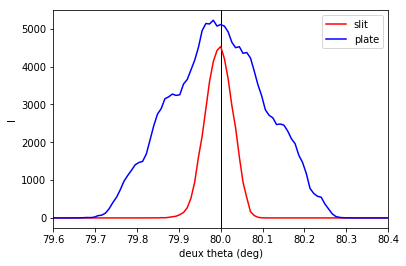

In [95]:
# Experiment

sample_position = {
    'omega':10, 'psi':0, 'phi':0,  # degree
    'X':0, 'Y':0, 'Z':0, # mm
}

deuxtheta_center = 80.
deuxtheta_range = 0.8
nbr_points = 91

deuxtheta_span = np.linspace(deuxtheta_center - deuxtheta_range/2,
                             deuxtheta_center + deuxtheta_range/2, nbr_points)

sample_params['deuxtheta_diff'] = deuxtheta_center

N = 50000
I_slit = scan_2theta(deuxtheta_span, N,
                hybride_collim_params, sample_params, sample_position,
                'slit', slit_detector_params)
I_plate = scan_2theta(deuxtheta_span, N,
                hybride_collim_params, sample_params, sample_position,
                'plate', plate_collimator_params)

# Graph
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_slit, 'r', label='slit');
plt.plot(deuxtheta_span, I_plate, 'b', label='plate');

plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);

## Function of psi

0, 5, 10, 15, 20, 25, 30, 45, 60, 75, 85, 

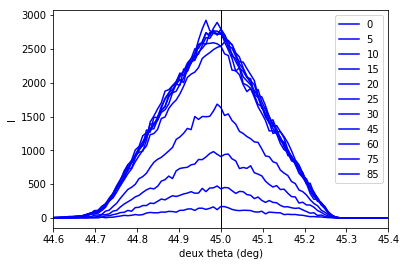

In [94]:
# Experiment

sample_position = {
    'omega':0, 'psi':10, 'phi':0,  # degree
    'X':0, 'Y':0, 'Z':0, # mm
}

deuxtheta_center = 45.
deuxtheta_range = 0.8
nbr_points = 91

deuxtheta_span = np.linspace(deuxtheta_center - deuxtheta_range/2,
                             deuxtheta_center + deuxtheta_range/2, nbr_points)

sample_params['deuxtheta_diff'] = deuxtheta_center

N = 20000
sample_position['psi'] = 0
psi_span = [0, 5, 10, 15, 20, 25, 30, 45, 60, 75, 85]
I_psi = []
I_psi_center = []
for psi in psi_span:
    print(psi, end=', ')
    sample_position['psi'] = psi
    I_psi_i = scan_2theta(deuxtheta_span, N,
                    hybride_collim_params, sample_params, sample_position,
                    'plate', plate_collimator_params)
    I_psi.append(I_psi_i)
    I_psi_center.append(I_psi_i[int(len(deuxtheta_span)/2)])
    plt.plot(deuxtheta_span, I_psi_i, 'b', label=str(psi));

# Graph
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')

plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);

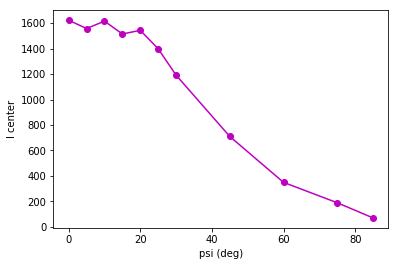

In [92]:
plt.plot(psi_span, I_psi_center, 'mo-')
plt.xlabel('psi (deg)');
plt.ylabel('I center');